In [162]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")


In [163]:
# Load the dataset
df = pd.read_csv('futuristic_city_traffic.csv')

# Exploratory Data Analysis

In [164]:
df.head()

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544


In [165]:
df.shape

(1219567, 11)

### Summary Statistics

In [166]:
# Display descriptive statistics with background gradient
df.describe().style.format(precision=2)

,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
count,1219567.00,1219567.00,1219567.00,1219567.00,1219567.00,1219567.00
mean,11.51,59.94,0.15,0.05,49.46,0.28
std,6.92,26.63,0.36,0.22,25.28,0.22
min,0.00,6.69,0.00,0.00,4.93,0.01
25%,6.00,37.53,0.00,0.00,29.27,0.11
50%,12.00,58.47,0.00,0.00,45.78,0.22
75%,17.00,80.53,0.00,0.00,65.91,0.40
max,23.00,163.09,1.00,1.00,189.95,3.38


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219567 entries, 0 to 1219566
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   City                   1219567 non-null  object 
 1   Vehicle Type           1219567 non-null  object 
 2   Weather                1219567 non-null  object 
 3   Economic Condition     1219567 non-null  object 
 4   Day Of Week            1219567 non-null  object 
 5   Hour Of Day            1219567 non-null  int64  
 6   Speed                  1219567 non-null  float64
 7   Is Peak Hour           1219567 non-null  int64  
 8   Random Event Occurred  1219567 non-null  int64  
 9   Energy Consumption     1219567 non-null  float64
 10  Traffic Density        1219567 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 102.4+ MB


### Check For Missing Values

In [168]:
print("Missing Values")
df.isnull().sum()

Missing Values


City                     0
Vehicle Type             0
Weather                  0
Economic Condition       0
Day Of Week              0
Hour Of Day              0
Speed                    0
Is Peak Hour             0
Random Event Occurred    0
Energy Consumption       0
Traffic Density          0
dtype: int64

### Check For Duplicates

In [169]:
print('Duplicate Values:')
df.duplicated().sum()

Duplicate Values:


0


# Analyzing traffic density throughout the day

By grouping data by Hour of Day and calculating the average Traffic Density for each hour

In [170]:

traffic_flow = df.groupby('Hour Of Day')['Traffic Density'].mean()

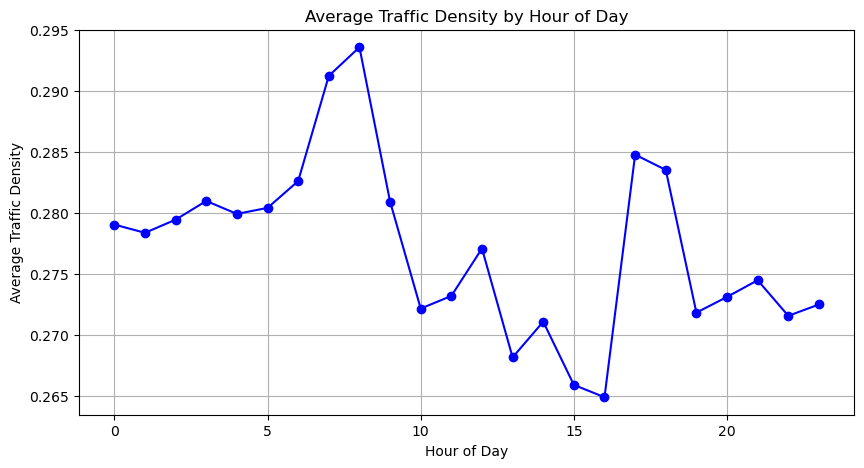

In [171]:
# Plotting
plt.figure(figsize=(10, 5))
traffic_flow.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title('Average Traffic Density by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Density')
plt.grid(True)
plt.show()

### Insights:

 - ```Plot Interpretation:``` There is a noticeable peak during morning and evening rush hours, with lower traffic density during late-night hours.

 - These findings can inform urban planning and transportation management strategies, such as optimizing traffic signal timing, managing congestion during peak hours, and planning infrastructure improvements.

 - Further analysis could investigate the causes of traffic density fluctuations, explore correlations with other variables such as weather or economic conditions, and evaluate the effectiveness of interventions aimed at reducing traffic congestion.


**Variability Analysis: Weekdays vs. Weekends**

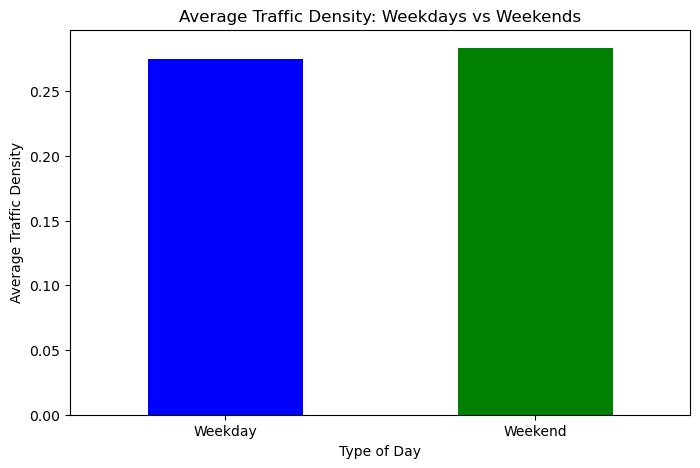

Average Traffic Density by Type of Day:
Type of Day
Weekday    0.274575
Weekend    0.283412
Name: Traffic Density, dtype: float64


In [172]:
df_copy = df.copy()

# Classify days as 'Weekday' or 'Weekend' in the copied DataFrame
df_copy['Type of Day'] = df_copy['Day Of Week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Group by Type of Day and calculate average traffic density on the copied DataFrame
average_traffic_by_day_type = df_copy.groupby('Type of Day')['Traffic Density'].mean()

# Plotting
plt.figure(figsize=(8, 5))
average_traffic_by_day_type.plot(kind='bar', color=['blue', 'green'])
plt.title('Average Traffic Density: Weekdays vs Weekends')
plt.ylabel('Average Traffic Density')
plt.xlabel('Type of Day')
plt.xticks(rotation=0)
plt.show()

# Printing results
print("Average Traffic Density by Type of Day:")
print(average_traffic_by_day_type)

**Impact of Special Events:**

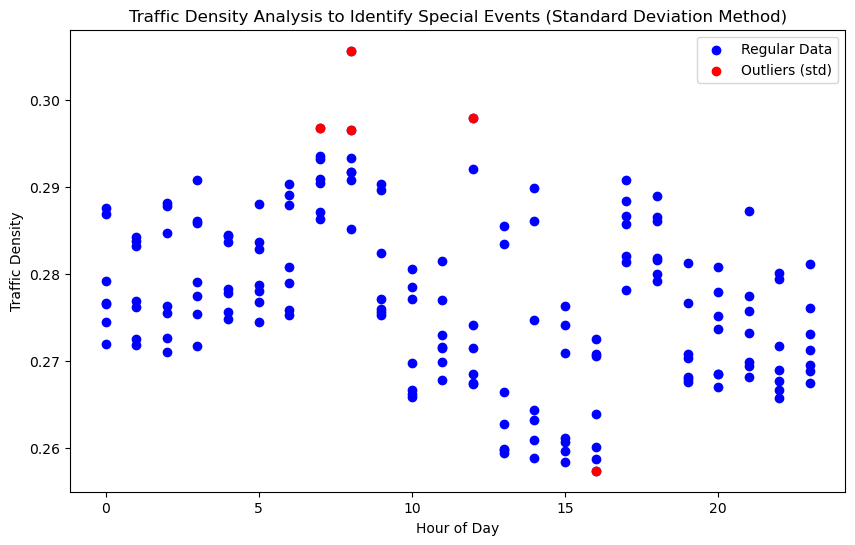

Detected Outliers (Possible Special Events) with Standard Deviation Method:
    Day Of Week  Hour Of Day  Traffic Density
7        Friday            7         0.296832
8        Friday            8         0.305703
60     Saturday           12         0.297990
152   Wednesday            8         0.296621
160   Wednesday           16         0.257403


In [173]:
# Calculate daily average traffic density if specific dates aren't available
average_daily_traffic = df.groupby(['Day Of Week', 'Hour Of Day'])['Traffic Density'].mean().reset_index()

# Calculate mean and standard deviation
mean_traffic = average_daily_traffic['Traffic Density'].mean()
std_traffic = average_daily_traffic['Traffic Density'].std()

# Define outliers as those beyond 2 standard deviations from the mean
outliers_std = average_daily_traffic[
    (average_daily_traffic['Traffic Density'] < (mean_traffic - 2 * std_traffic)) | 
    (average_daily_traffic['Traffic Density'] > (mean_traffic + 2 * std_traffic))
]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(average_daily_traffic['Hour Of Day'], average_daily_traffic['Traffic Density'], color='blue', label='Regular Data')
plt.scatter(outliers_std['Hour Of Day'], outliers_std['Traffic Density'], color='red', label='Outliers (std)')
plt.title('Traffic Density Analysis to Identify Special Events (Standard Deviation Method)')
plt.xlabel('Hour of Day')
plt.ylabel('Traffic Density')
plt.legend()
plt.show()

# Print results
print("Detected Outliers (Possible Special Events) with Standard Deviation Method:")
print(outliers_std)

**Time Series Analysis (Simulated)**

We'll print the pivoted data that shows average traffic density by hour and day of the week.

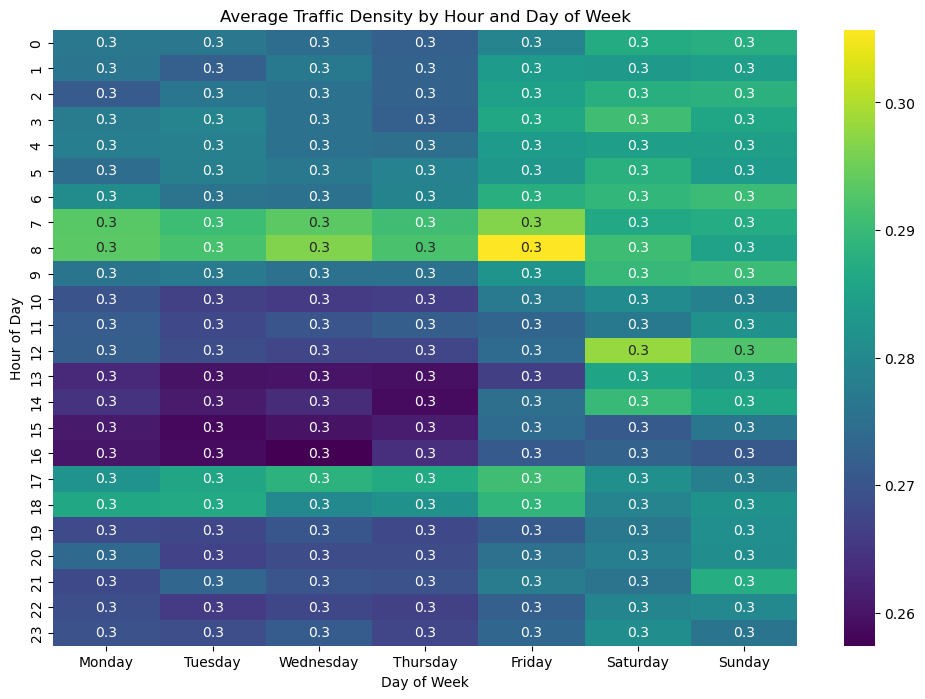

Average Traffic Density by Hour and Day of Week:
Day Of Week    Monday   Tuesday  Wednesday  Thursday    Friday  Saturday  \
Hour Of Day                                                                
0            0.276653  0.276594   0.274512  0.271930  0.279249  0.286951   
1            0.276190  0.271844   0.276950  0.272532  0.283771  0.283286   
2            0.271019  0.276354   0.275558  0.272671  0.284701  0.287802   
3            0.277490  0.279114   0.275457  0.271743  0.286142  0.290827   
4            0.277869  0.278258   0.275663  0.274908  0.283742  0.284483   
5            0.274450  0.278068   0.276830  0.278722  0.282953  0.288031   
6            0.280794  0.275884   0.275352  0.279031  0.287922  0.289164   
7            0.293208  0.290456   0.293600  0.290963  0.296832  0.286342   
8            0.293344  0.291722   0.296621  0.291767  0.305703  0.290780   
9            0.275956  0.277127   0.275366  0.275663  0.282385  0.289698   
10           0.269830  0.266671   0.265

In [174]:
# Create a heatmap of average traffic density by hour and day of the week
pivot_table = df.pivot_table(values='Traffic Density', index='Hour Of Day', columns='Day Of Week', aggfunc='mean')

# Ordering days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table[days_order]

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt=".1f")
plt.title('Average Traffic Density by Hour and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.show()

# Printing results
print("Average Traffic Density by Hour and Day of Week:")
print(pivot_table)


**Predictive Modeling**: 
Short-term forecasting models to predict traffic density for the next hour or day based on historical patterns, which can aid in dynamic traffic management and routing.

Mean Squared Error: 0.04801342973137455


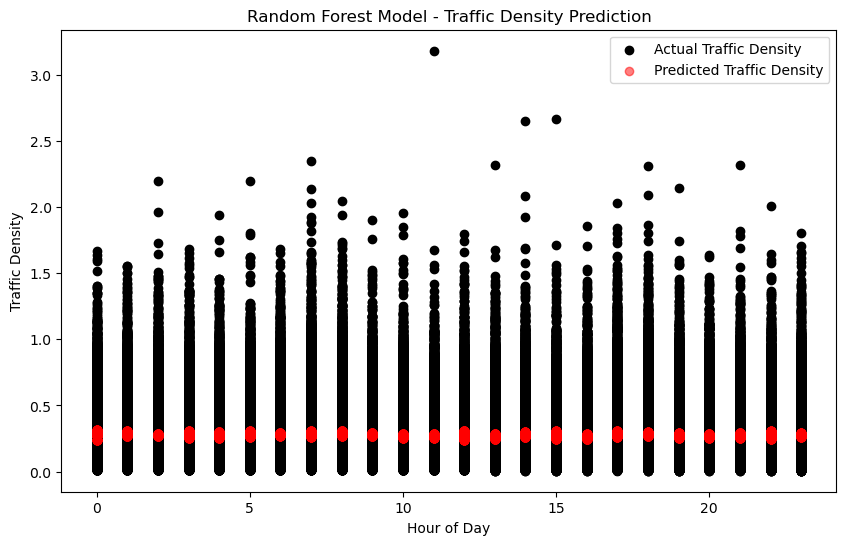

In [175]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare your DataFrame 'df'
# Assuming df is preprocessed and ready for modeling
X = df[['Hour Of Day', 'Random Event Occurred', 'Day Of Week']]  # Including more features
y = df['Traffic Density']

# Encoding categorical data
X = pd.get_dummies(X, columns=['Day Of Week'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualize actual vs predicted results
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Hour Of Day'], y_test, color='black', label='Actual Traffic Density')
plt.scatter(X_test['Hour Of Day'], y_pred, color='red', alpha=0.5, label='Predicted Traffic Density')
plt.title('Random Forest Model - Traffic Density Prediction')
plt.xlabel('Hour of Day')
plt.ylabel('Traffic Density')
plt.legend()
plt.show()


# Analyzing Energy Consumption vs. Traffic Density

### Using the following methods:
- ```Scatter Plot```: To visually inspect the relationship between traffic density and energy consumption.

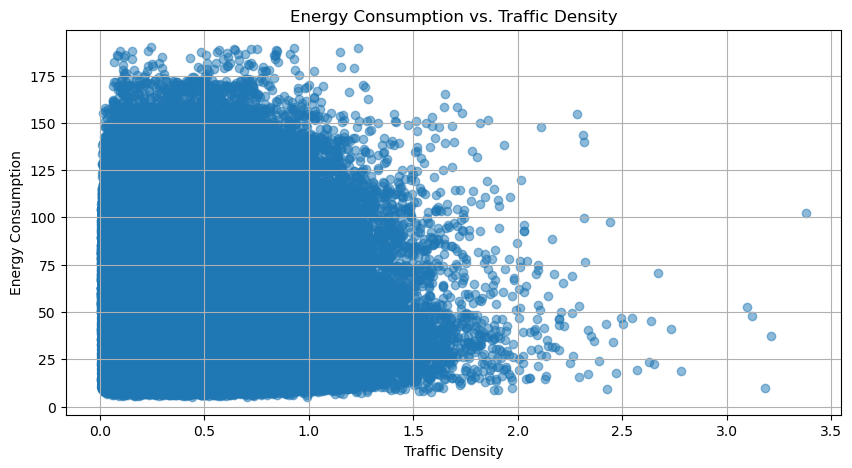

In [176]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Traffic Density'], df['Energy Consumption'], alpha=0.5)
plt.title('Energy Consumption vs. Traffic Density')
plt.xlabel('Traffic Density')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.show()


- ```Regression Analysis```: To quantify the relationship and predict energy consumption based on traffic density.


Mean Squared Error: 638.1793338387766


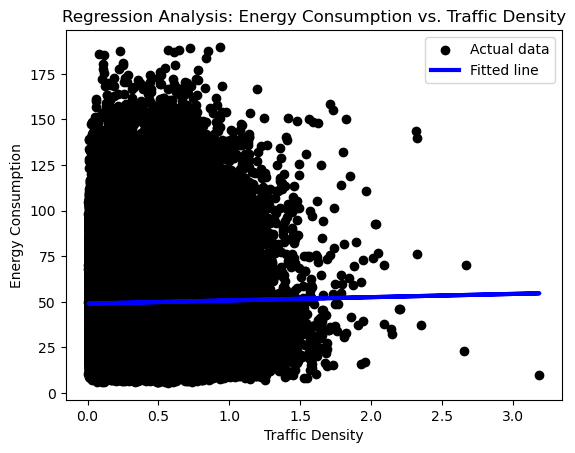

In [177]:
X = df[['Traffic Density']]  # Feature matrix
y = df['Energy Consumption']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting regression
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Fitted line')
plt.title('Regression Analysis: Energy Consumption vs. Traffic Density')
plt.xlabel('Traffic Density')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

- ``Time Series Analysis``: Observe how traffic density and energy consumption patterns emerge across different times and days

1. ***Group by Hour of Day***: This will help visualize how traffic density and energy consumption vary by the hour throughout a typical day.

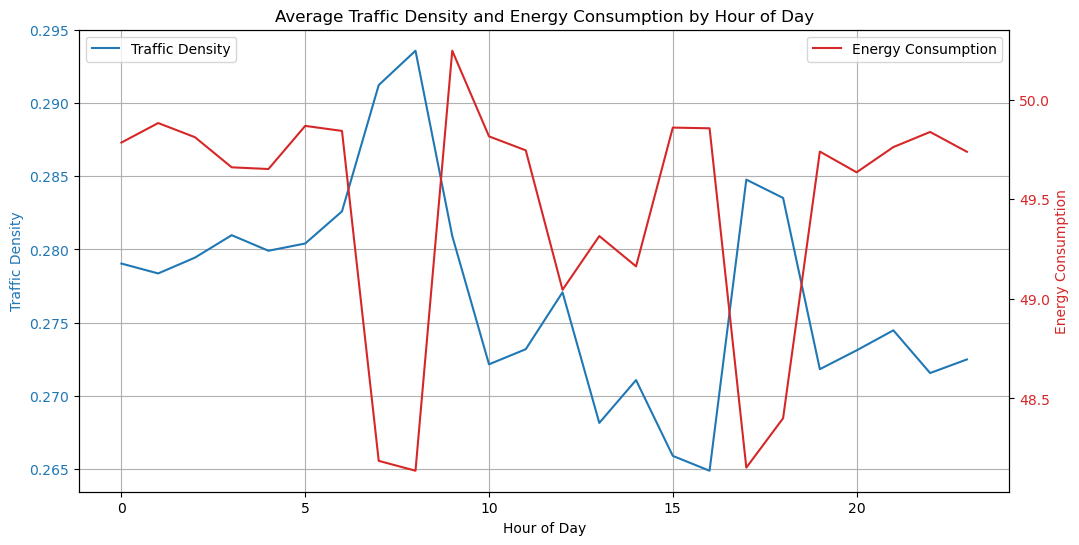

In [178]:
hourly_data = df.groupby('Hour Of Day')[['Traffic Density', 'Energy Consumption']].mean()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create the first subplot for traffic density
color = 'tab:blue'
hourly_data['Traffic Density'].plot(color=color, ax=ax1)
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Traffic Density', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Average Traffic Density and Energy Consumption by Hour of Day')
ax1.grid(True)

# Create a second y-axis for Energy Consumption
ax2 = ax1.twinx()
color = 'tab:red'
hourly_data['Energy Consumption'].plot(color=color, ax=ax2)
ax2.set_ylabel('Energy Consumption', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Adjust legend to include only specific labels
ax1.legend(['Traffic Density'], loc='upper left')
ax2.legend(['Energy Consumption'], loc='upper right')

plt.show()

2. ***Group by Day of the Week***: This will show patterns related to weekdays versus weekends

In [179]:
# Mapping days of the week from string to an ordered category
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day Of Week'] = pd.Categorical(df['Day Of Week'], categories=days_order, ordered=True)

# Grouping by 'Day Of Week'
weekly_data = df.groupby('Day Of Week')[['Traffic Density', 'Energy Consumption']].mean()

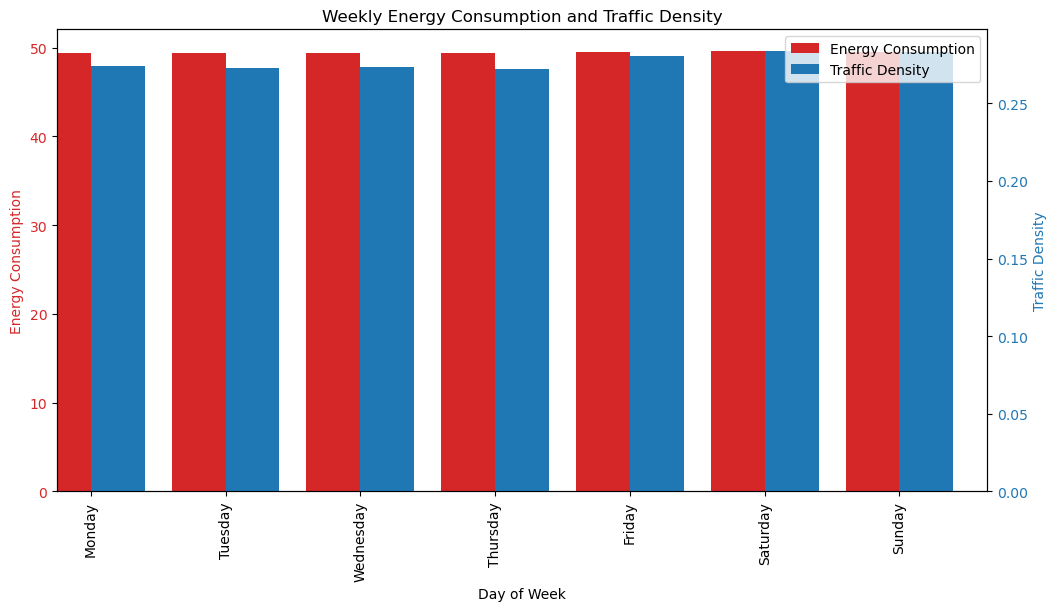

In [180]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for Energy Consumption
color = 'tab:red'
weekly_data['Energy Consumption'].plot(kind='bar', color=color, ax=ax1, position=1, width=0.4)
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Energy Consumption', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for Traffic Density
ax2 = ax1.twinx()
color = 'tab:blue'
weekly_data['Traffic Density'].plot(kind='bar', color=color, ax=ax2, position=0, width=0.4)
ax2.set_ylabel('Traffic Density', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Adjust legend
fig.legend(['Energy Consumption', 'Traffic Density'], loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.title('Weekly Energy Consumption and Traffic Density')

plt.show()

# Convert Categorical Data to Numeric

In [181]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Convert categorical columns to numeric
df['City'] = le.fit_transform(df['City'])
df['Weather'] = le.fit_transform(df['Weather'])

# Now check the DataFrame's data types to confirm conversion
print(df.dtypes)


City                        int32
Vehicle Type               object
Weather                     int32
Economic Condition         object
Day Of Week              category
Hour Of Day                 int64
Speed                     float64
Is Peak Hour                int64
Random Event Occurred       int64
Energy Consumption        float64
Traffic Density           float64
dtype: object


# Correlation matrix heatmap

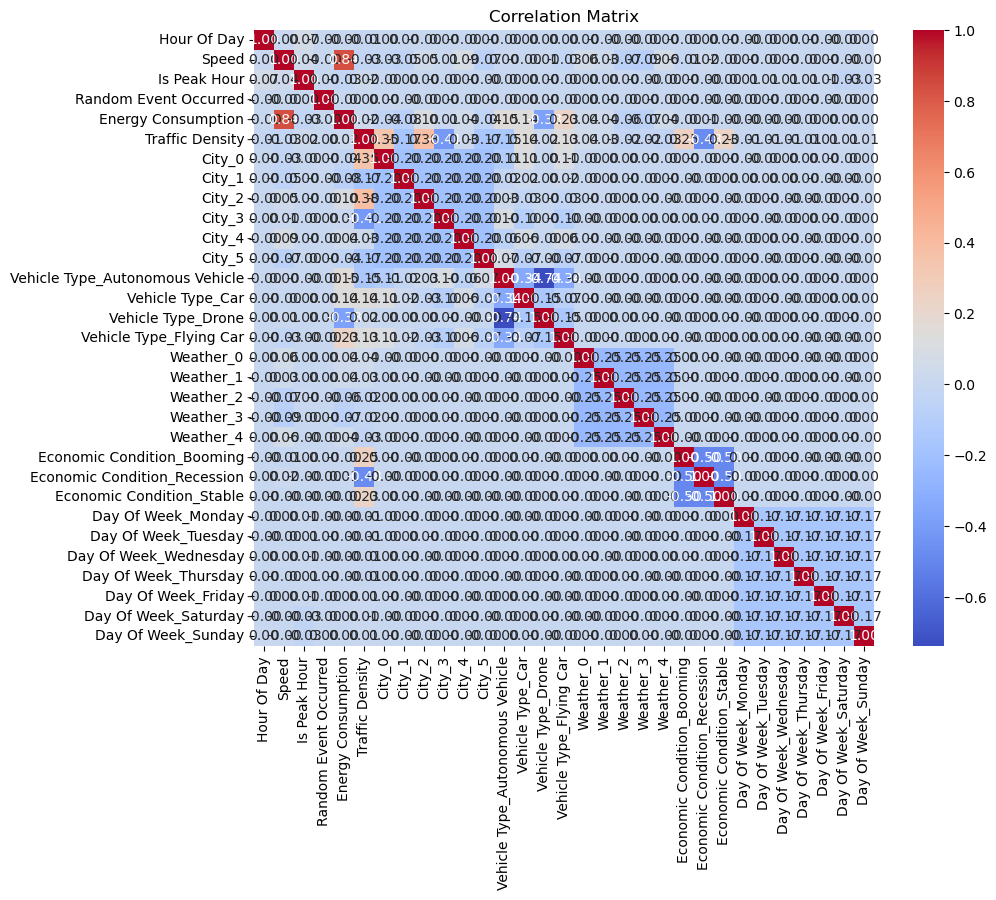

In [182]:
# onehot encode the columns
categorical_features = ['City', 'Vehicle Type', 'Weather', 'Economic Condition', 'Day Of Week']
df = pd.get_dummies(df, columns=categorical_features)
df.head()


plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#  GBMs (Gradient Boosting Machines using Scikit-Learn)

GBMs are good for handling non-linear relationships and interactions between features. They are less likely to overfit compared to other complex models when properly tuned.
GBMs can effectively integrate and analyze the impact of different environmental and economic conditions on traffic flow and energy consumption, providing robust predictive accuracy. GBMs handel diverse datasets.

In [183]:
# Prepare your data
X = pd.get_dummies(df.drop(['Energy Consumption'], axis=1))
y = df['Energy Consumption']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the GBM model
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gbm_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = gbm_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Gradient Boosting Machine MSE:", mse)

Gradient Boosting Machine MSE: 14.452012165081987
